<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectifs-:" data-toc-modified-id="Objectifs-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectifs :</a></span></li><li><span><a href="#Recheche-de-stations-HS" data-toc-modified-id="Recheche-de-stations-HS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recheche de stations HS</a></span><ul class="toc-item"><li><span><a href="#Station-toujours-HS" data-toc-modified-id="Station-toujours-HS-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Station toujours HS</a></span></li><li><span><a href="#Recherche-stations-temporairement-HS" data-toc-modified-id="Recherche-stations-temporairement-HS-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Recherche stations temporairement HS</a></span></li><li><span><a href="#Graphique-activité-stations" data-toc-modified-id="Graphique-activité-stations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Graphique activité stations</a></span></li><li><span><a href="#Visualisation-random-de-cas-probable-de-station-HS" data-toc-modified-id="Visualisation-random-de-cas-probable-de-station-HS-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualisation random de cas probable de station HS</a></span></li></ul></li></ul></div>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from vcub_keeper.config import ROOT_DATA_CLEAN
from vcub_keeper.reader.reader import read_time_serie_activity
from vcub_keeper.transform.features_factory import (
                                                    get_consecutive_no_transactions_out,
                                                    get_transactions_all,
                                                    get_transactions_in,
                                                    get_transactions_out,
)
from vcub_keeper.visualisation import plot_station_activity

sns.set_style('whitegrid')
%matplotlib inline

%load_ext autoreload
%autoreload 2

pd.options.display.max_rows = 500

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Objectifs :

- Recherche de stations HS
- Regarder en amonts temporellement des stations HS si il y a une activité.
- Faire une fonction graphique afin d'observer l'activité d'une stations dans le temps.

## Recheche de stations HS

### Station toujours HS

Dans les nouvelles données (plus d'historique), il n'y a plus de stations toujours HS

In [3]:
#ts_activity = read_time_serie_activity(path_directory=ROOT_DATA_CLEAN)

### Recherche stations temporairement HS

In [8]:
# Lecture du fichier activité
ts_activity = read_time_serie_activity(path_directory=ROOT_DATA_CLEAN)

# Some features
ts_activity = get_transactions_in(ts_activity)
ts_activity = get_transactions_out(ts_activity)
ts_activity = get_transactions_all(ts_activity)
ts_activity = get_consecutive_no_transactions_out(ts_activity)
ts_activity = ts_activity.collect().to_pandas()

In [9]:
ts_activity.tail()

,station_id,date,available_stands,available_bikes,status,transactions_in,transactions_out,transactions_all,consecutive_no_transactions_out
12794668,251,2020-08-28 11:10:00,28,12,1,0,0,0,5
12794669,251,2020-08-28 11:20:00,28,12,1,0,0,0,6
12794670,251,2020-08-28 11:30:00,26,14,1,2,0,2,7
12794671,251,2020-08-28 11:40:00,26,14,1,0,0,0,8
12794672,251,2020-08-28 11:50:00,26,14,1,0,0,0,9


In [10]:
ts_activity.shape

(12794673, 9)

In [11]:
station_max_inactivity = \
    ts_activity[ts_activity['status'] == 1].groupby('station_id', 
                                                    as_index=False)['consecutive_no_transactions_out'].agg({'mean' : 'mean',
                                                                                            'median' : 'median',
                                                                                            'std' : 'std',
                                                                                            '95%': lambda x: x.quantile(0.95),
                                                                                            '98%': lambda x: x.quantile(0.98),
                                                                                            '99%': lambda x: x.quantile(0.99),
                                                                                             'max' : 'max'
                                                                                                           })
station_max_inactivity = station_max_inactivity.sort_values('99%', ascending=0)

/tmp/ipykernel_2324680/1355320922.py:3: FutureWarning:

Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.



In [12]:
station_max_inactivity

,station_id,mean,median,std,95%,98%,99%,max
159,160,881.245809,520.0,1097.694179,2939.75,5036.10,5755.55,6475
179,180,574.235408,404.0,596.817486,1659.95,2656.98,3049.99,3443
160,161,478.303052,267.0,605.356500,1943.00,2659.80,2898.40,3431
181,182,313.636261,90.0,572.042654,1767.35,2509.94,2757.47,3005
149,150,218.186753,103.0,346.539777,850.00,1445.40,1974.70,2698
167,168,345.361401,199.0,395.888961,1187.00,1511.22,1792.00,2215
86,87,152.865083,69.0,280.302241,561.00,1306.20,1668.00,2200
91,92,305.444785,203.0,328.061930,934.00,1317.00,1633.59,2103
80,81,230.118522,117.0,315.969484,882.00,1363.62,1617.00,2167
70,71,184.060750,95.0,271.824051,644.80,1188.12,1550.56,2081


<Axes: ylabel='consecutive_no_transactions_out'>

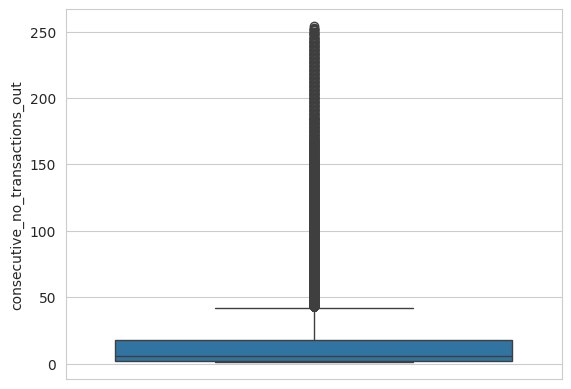

In [13]:
station_id = 102
temp = ts_activity[ts_activity['station_id'] == station_id]
# On ne prend pas les consecutive_no_transactions_out == 0 (déconnection)
temp = temp[temp['consecutive_no_transactions_out'] != 0]
sns.boxplot(temp.consecutive_no_transactions_out)

Lorsque la feature `consecutive_no_transactions_out` est haute, il y a sans doute de fortes chances que la station a été HS pendant un certain temps.

Si `consecutive_no_transactions_out` est très haut >= 5000, c'est sans doute lié à des travaux : 
 - 244
 - 181
 - 138
 - 145

D'autres stations on un `consecutive_no_transactions_out` beaucoup plus faible même si ils semblent qu'elles étaient HS durant une petite période : 
 - 10
 - 127
 - Etc...

### Graphique activité stations

In [ ]:
station_id = 94
start_date = "2020-07-01"
end_date = "2020-08-29"
tt = plot_station_activity(ts_activity, station_id=station_id, 
                      features_to_plot=['available_bikes', 'available_stands',
                                       'consecutive_no_transactions_out', 'status'],
                      #start_date=start_date,
                      #end_date=end_date,
                      return_data=True
                     )

```
station_id = 145
start_date = "2020-07-01"
end_date = "2020-08-29"
````

Ré ouverture de la station 145 le 4 Aout. [Source](https://twitter.com/TBM_V3/status/1290736765381181442)

```
station_id = 100
start_date = "2020-08-01"
end_date = "2020-08-29"
```

Coupure du courant de la station 100 le 7 Aout. [Source](https://twitter.com/TBM_V3/status/1291667742970585088)

```
station_id = 110
start_date = "2020-07-20"
end_date = "2020-07-21"
```

Station 110 HS le 20 Juillet vers 11h. [Source](https://twitter.com/supersardine/status/1285142247831416833)

### Visualisation random de cas probable de station HS

In [15]:
threeshold = 110 
ramdom_anomalie = ts_activity[ts_activity['consecutive_no_transactions_out'] >= threeshold].copy()
ramdom_anomalie['date_day'] = ramdom_anomalie['date'].dt.date
random_anoamlie_by_day = \
    ramdom_anomalie.groupby(['date_day', 'station_id'],
                            as_index=False)['consecutive_no_transactions_out'].max()

In [ ]:
rng = random_anoamlie_by_day.sample(1)
station_id = rng['station_id'].values[0]
start_date = (rng['date_day'].values[0] - pd.Timedelta(days=21)).strftime('%Y-%m-%d')
end_date = (rng['date_day'].values[0] + pd.Timedelta(days=7)).strftime('%Y-%m-%d')


print(rng)
tt = plot_station_activity(ts_activity, station_id=station_id, 
                      features_to_plot=['available_bikes', 'available_stands',
                                       'consecutive_no_transactions_out', 'status'],
                      start_date=start_date,
                      end_date=end_date,
                      return_data=True
                     )


Dans le cas ou la station est FULL de vélo, il ne faut pas prendre en compte `consecutive_no_transactions_out`

In [18]:
tt[tt.date >= "2019-07-22 05:00:00"].head(100)

,station_id,date,available_stands,available_bikes,status,transactions_in,transactions_out,transactions_all,consecutive_no_transactions_out
12661544,182,2020-03-18 00:00:00,15,5,1,0,0,0,225
12661545,182,2020-03-18 00:10:00,15,5,1,0,0,0,226
12661546,182,2020-03-18 00:20:00,15,5,1,0,0,0,227
12661547,182,2020-03-18 00:30:00,15,5,1,0,0,0,228
12661548,182,2020-03-18 00:40:00,15,5,1,0,0,0,229
12661549,182,2020-03-18 00:50:00,15,5,1,0,0,0,230
12661550,182,2020-03-18 01:00:00,15,5,1,0,0,0,231
12661551,182,2020-03-18 01:10:00,15,5,1,0,0,0,232
12661552,182,2020-03-18 01:20:00,15,5,1,0,0,0,233
12661553,182,2020-03-18 01:30:00,15,5,1,0,0,0,234
